In [1]:
import pandas as pd

In [15]:
import sys
import os
sys.path.append(os.path.abspath("../scripts"))

In [16]:
#importing the class InsuranceEDA from scripts folder
from scripts import *
from Insurance_eda import InsuranceEDA
from main_visualization import InsuranceEda

In [4]:
df=pd.read_csv("..\\Data\\output.csv", low_memory=False)

In [5]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
df.shape

(1000098, 52)

In [8]:
df.columns

Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')

# Basic Eda for Insurance Data

In [6]:
eda = InsuranceEDA(df)

In [7]:
# basic eda
eda.display_info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province    

In [8]:
#converting_date to Datetime
eda.convert_dates(['TransactionMonth', 'VehicleIntroDate'])


Date columns converted.


c:\Users\lenovo\OneDrive\Desktop\10Academy Files\week_3\Alpha_care\scripts\Insurance_eda.py:54: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col], errors='coerce')


In [14]:
#check_missing_values
eda.check_missing_values()


Missing Values:
VehicleIntroDate               552
NumberOfVehiclesInFleet    1000098
dtype: int64


In [10]:
eda.handle_missing_values()


Handling Missing Values:
Skipping column VehicleIntroDate, unsupported data type: datetime64[ns]


c:\Users\lenovo\OneDrive\Desktop\10Academy Files\week_3\Alpha_care\week3\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Users\lenovo\OneDrive\Desktop\10Academy Files\week_3\Alpha_care\scripts\Insurance_eda.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df[col].fillna(self.df[col].median(), inplace=True)  # Fill with median


In [46]:
#Descriptive statistics
eda.descriptive_statistics(['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm'])


Descriptive Statistics:
       TotalPremium   TotalClaims    SumInsured  CalculatedPremiumPerTerm
count  1.000098e+06  1.000098e+06  1.000098e+06              1.000098e+06
mean   6.190550e+01  6.486119e+01  6.041727e+05              1.178757e+02
std    2.302845e+02  2.384075e+03  1.508332e+06              3.997017e+02
min   -7.825768e+02 -1.200241e+04  1.000000e-02              0.000000e+00
25%    0.000000e+00  0.000000e+00  5.000000e+03              3.224800e+00
50%    2.178333e+00  0.000000e+00  7.500000e+03              8.436900e+00
75%    2.192982e+01  0.000000e+00  2.500000e+05              9.000000e+01
max    6.528260e+04  3.930921e+05  1.263620e+07              7.442217e+04


In [12]:
num_colum=['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
cat_colum=['Citizenship','Language', 'Bank','MaritalStatus', 'Gender', 'Country', 'Province','VehicleType','CoverCategory', 'CoverGroup']

In [33]:
#detecting categorical col
detected_cat_col=eda.detect_categorical_columns()


Detected Categorical Columns: ['IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make', 'Model', 'Cylinders', 'bodytype', 'NumberOfDoors', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'TermFrequency', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType']


In [34]:
#convert categorical col
eda.convert_categorical(detected_cat_col)


Categorical columns converted.



Outlier Counts:
{'TotalPremium': 209042, 'TotalClaims': 2793, 'SumInsured': 104294, 'CalculatedPremiumPerTerm': 175508}


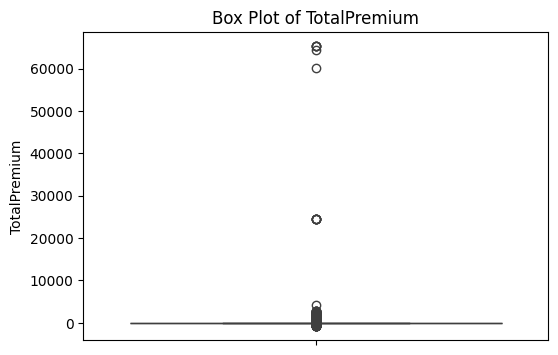

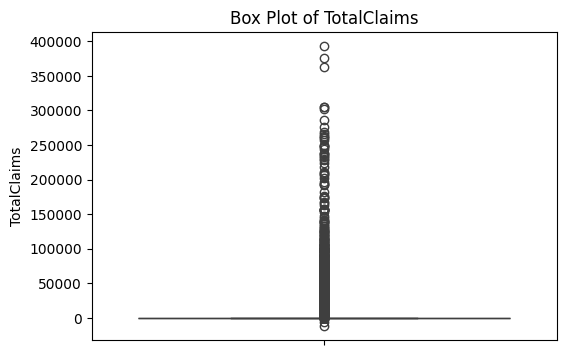

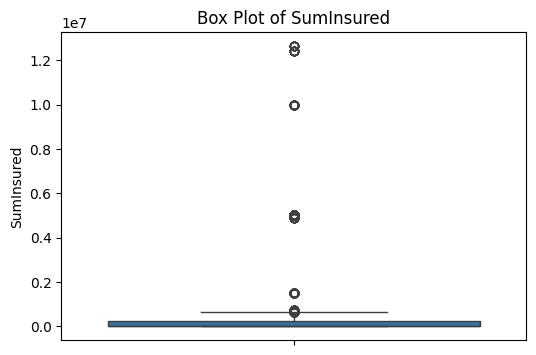

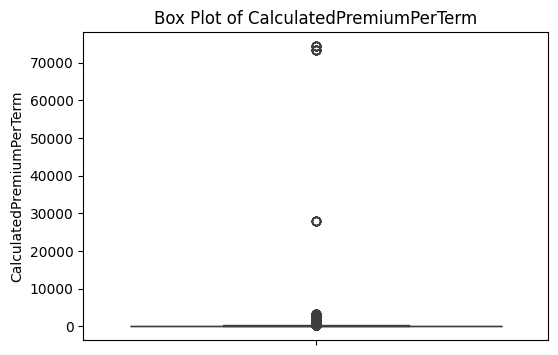

In [16]:
eda.check_outliers(['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm'])

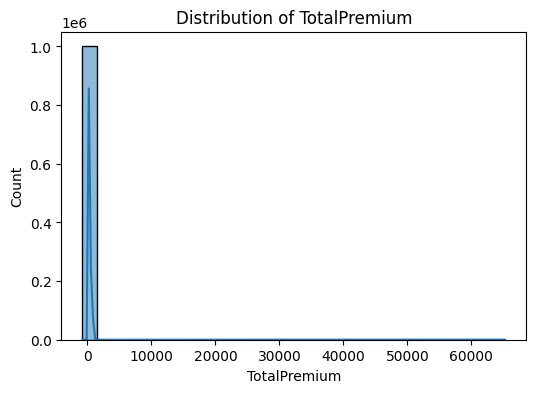

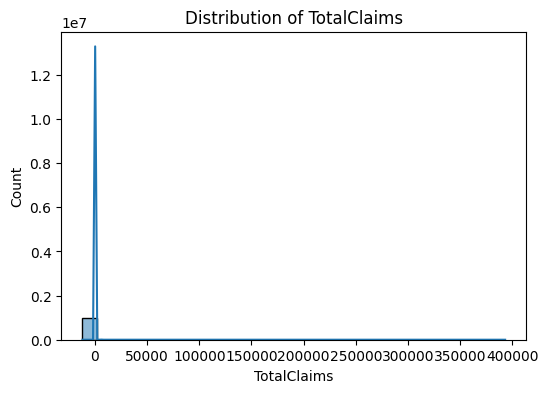

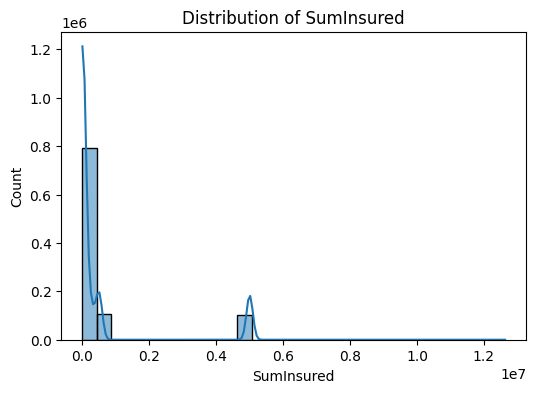

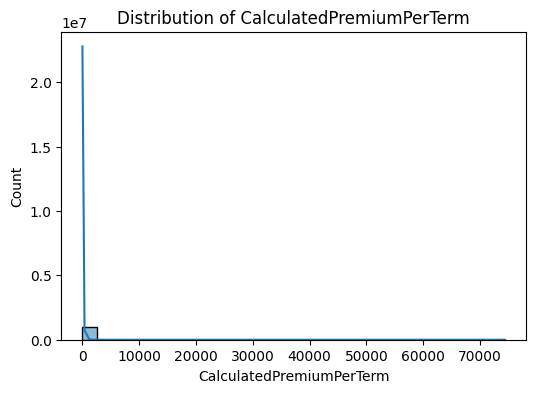

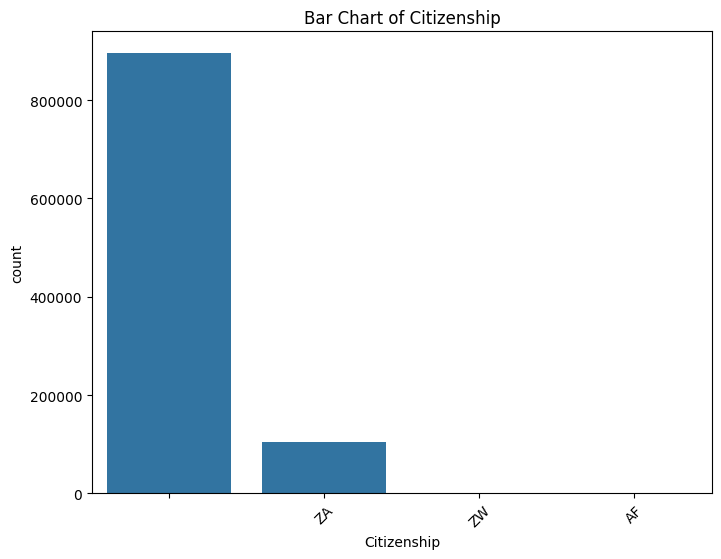

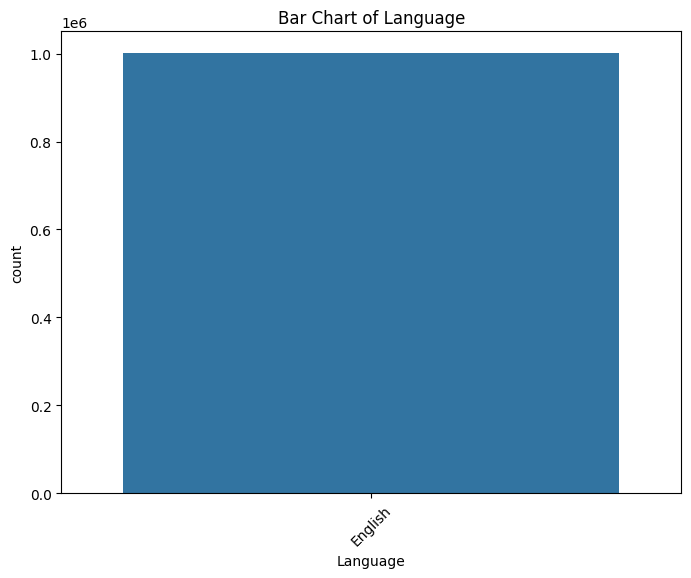

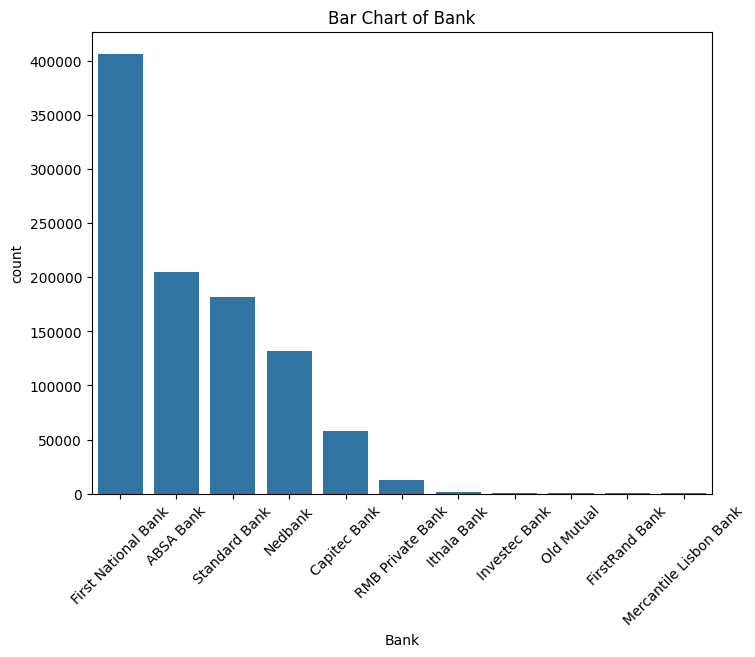

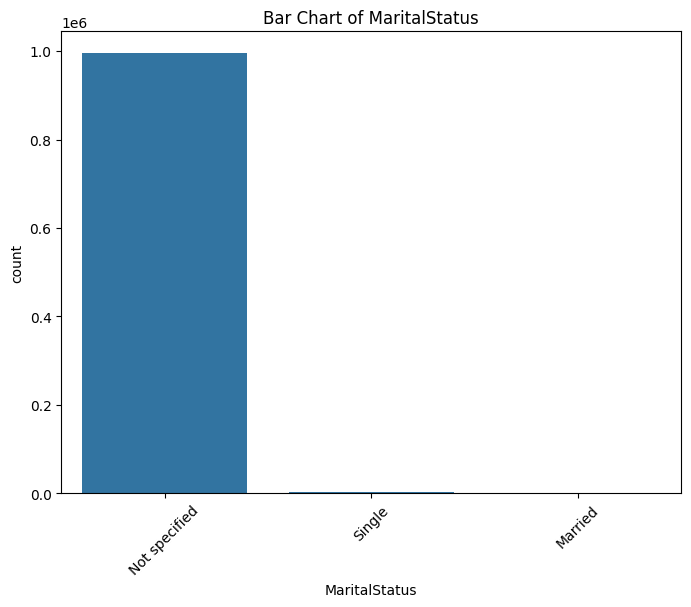

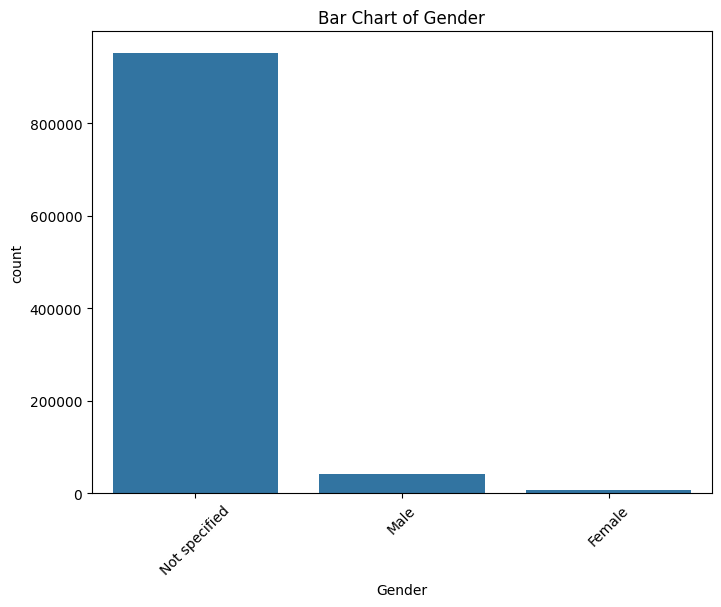

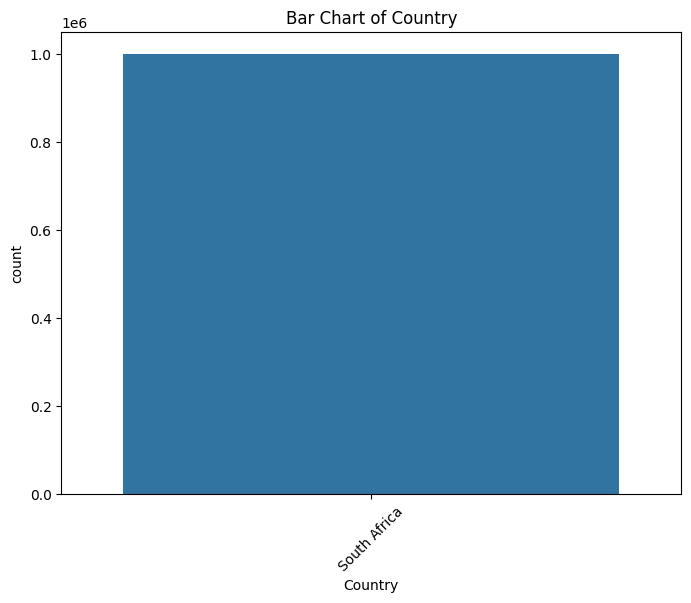

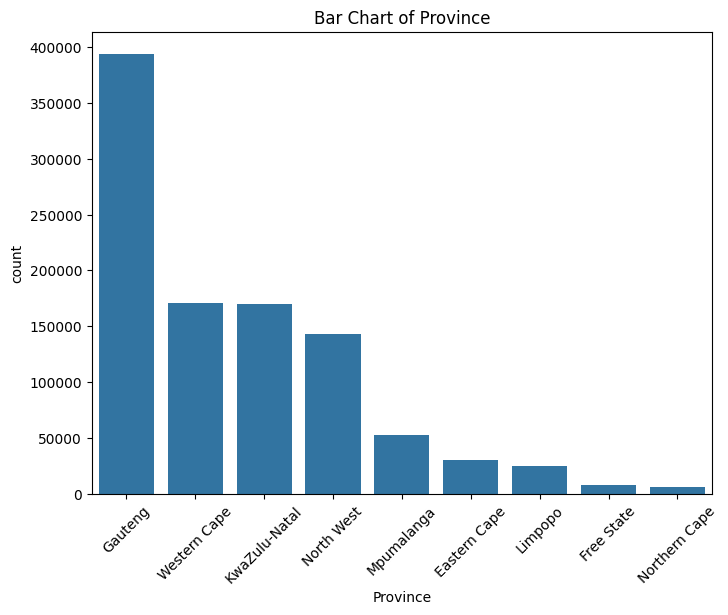

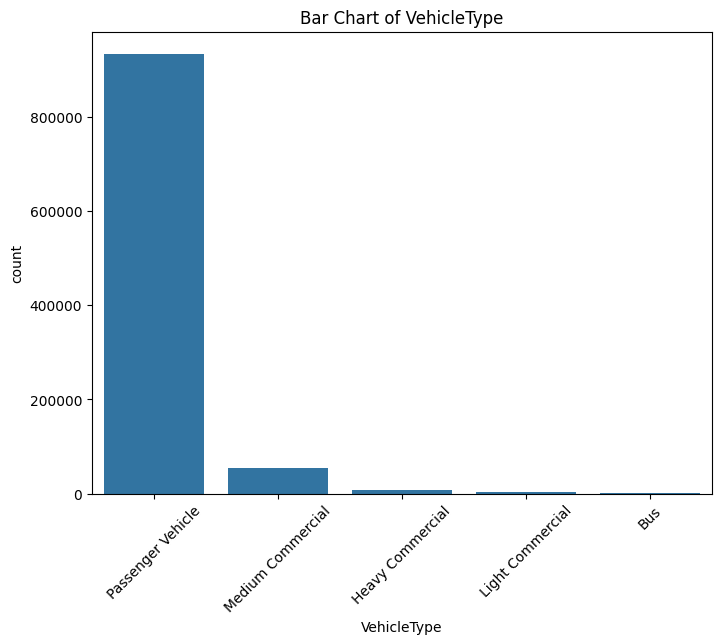

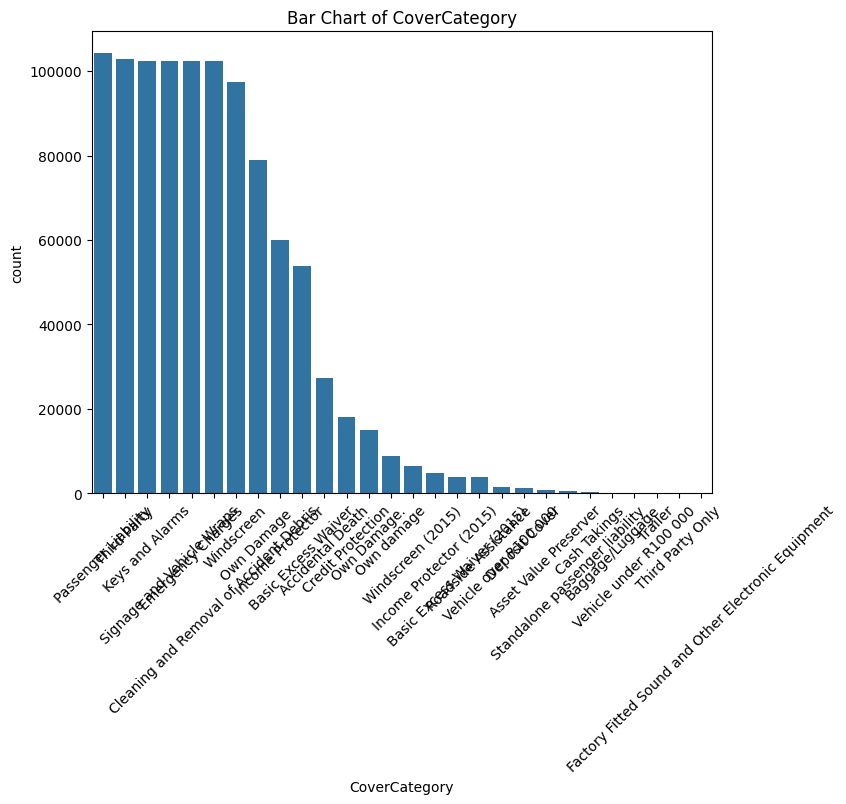

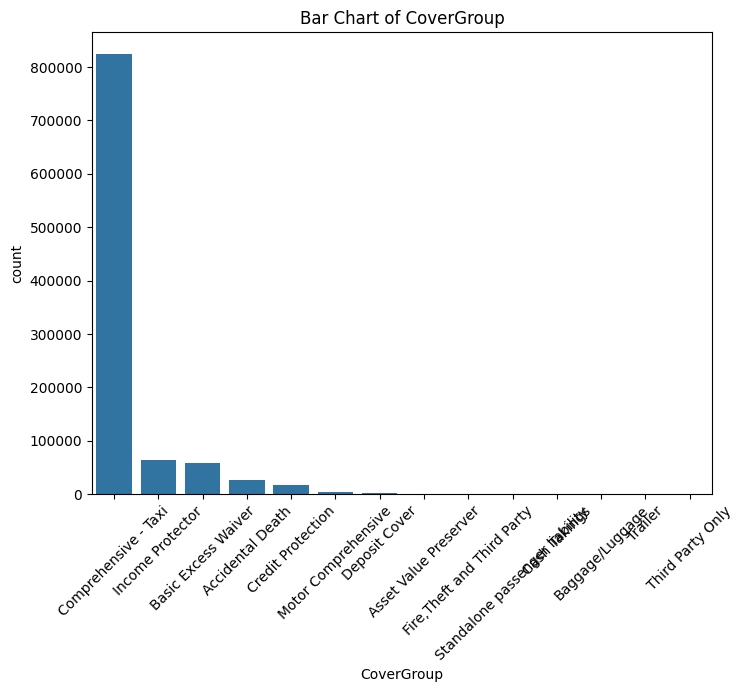

In [16]:
eda.plot_distributions(num_colum,cat_colum)

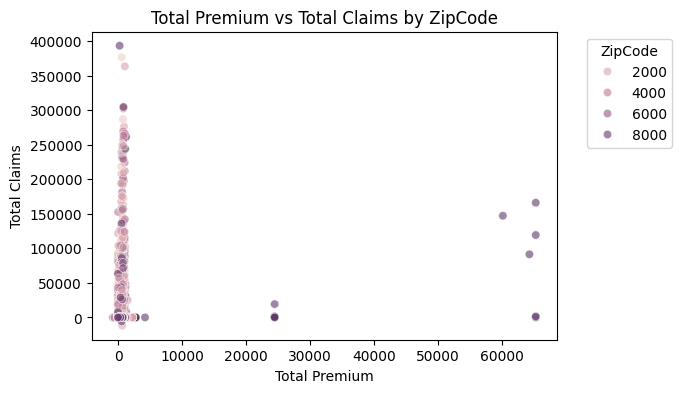

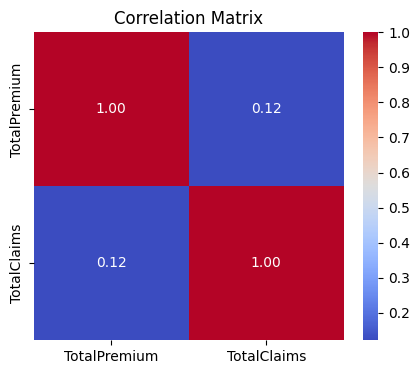

In [61]:
eda.correlation_analysis()

# THREE MAIN VISUALIZATION FROM MY WORK

In [11]:
vis=InsuranceEda(df)

ZipCode column added with dummy values: ['Z1', 'Z2', 'Z3']
TransactionMonth converted to datetime format.


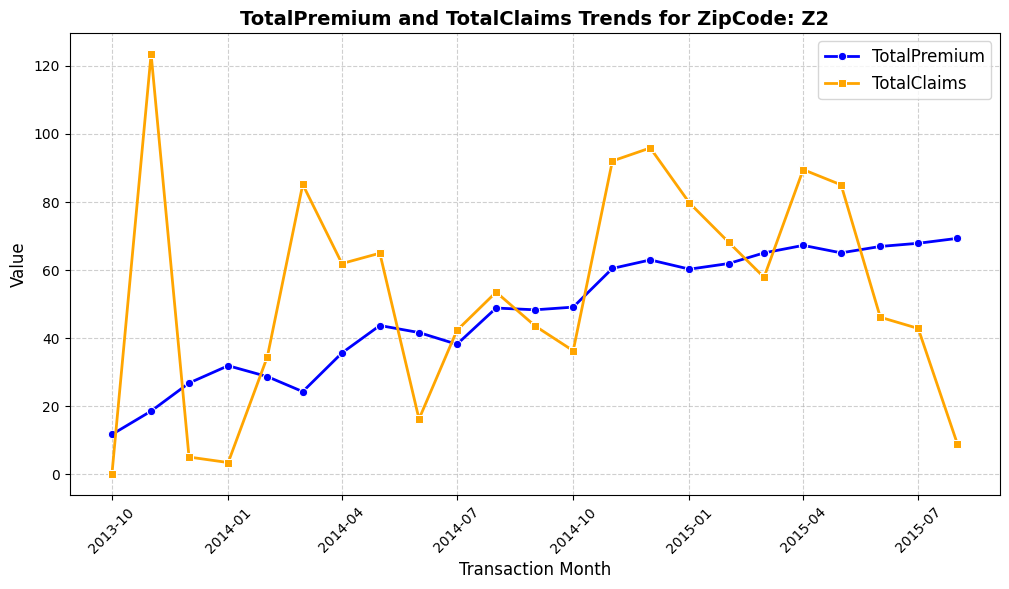

In [13]:
vis.plot_premium_claim_trends()

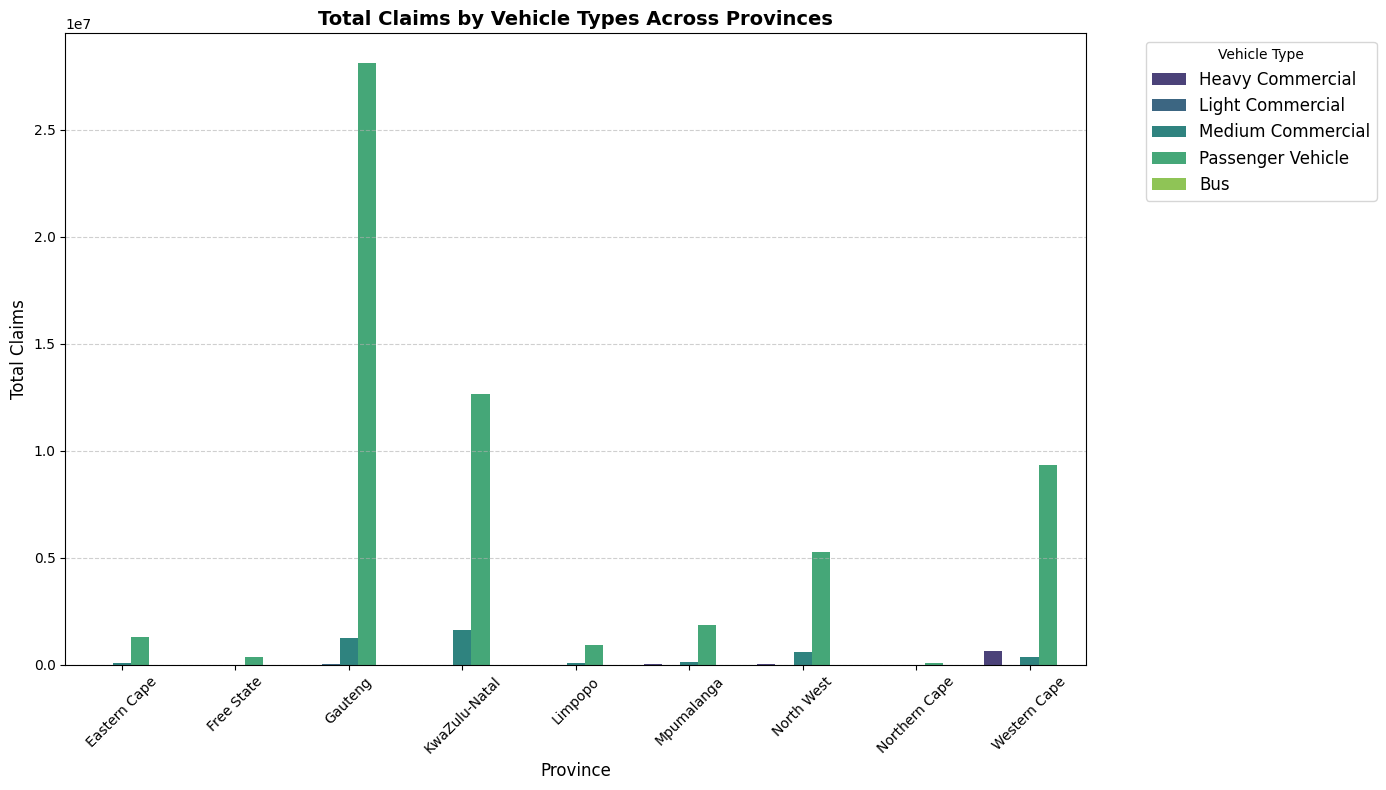

In [14]:
vis.plot_claims_by_vehicle_province()

In [ ]:
vis.